<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.616073,29.108722,-0.004281,65.720514,65.721331,-0.000817
1,0.0,1.0,93.966305,93.643702,0.007528,197.617535,197.612792,0.004743
2,0.0,2.0,20.724371,86.844696,0.000097,117.569164,117.567997,0.001167
3,0.0,3.0,98.584842,26.416288,-0.011127,134.990003,135.001019,-0.011016
4,0.0,4.0,79.399556,53.083483,0.006512,142.489551,142.483238,0.006313
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.984308,22.431189,-0.029485,83.386011,83.412772,-0.026761
59996,999.0,56.0,56.197972,38.412519,0.004372,104.614863,104.609188,0.005675
59997,999.0,57.0,68.973054,51.615048,0.006531,130.594632,130.588114,0.006519
59998,999.0,58.0,59.653578,56.015700,0.000557,125.669836,125.669503,0.000332


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.616073  29.108722 -0.004281   65.720514   65.721331 -0.000817
      1.0    93.966305  93.643702  0.007528  197.617535  197.612792  0.004743
      2.0    20.724371  86.844696  0.000097  117.569164  117.567997  0.001167
      3.0    98.584842  26.416288 -0.011127  134.990003  135.001019 -0.011016
      4.0    79.399556  53.083483  0.006512  142.489551  142.483238  0.006313
...                ...        ...       ...         ...         ...       ...
999.0 55.0   50.984308  22.431189 -0.029485   83.386011   83.412772 -0.026761
      56.0   56.197972  38.412519  0.004372  104.614863  104.609188  0.005675
      57.0   68.973054  51.615048  0.006531  130.594632  130.588114  0.006519
      58.0   59.653578  56.015700  0.000557  125.669836  125.669503  0.000332
      59.0   51.204776  84.560632 -0.000155  145.765252  145.767878 -0.002625

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.616073  29.108722 -0.004281   65.720514   65.721331 -0.000817
      1.0    93.966305  93.643702  0.007528  197.617535  197.612792  0.004743
      2.0    20.724371  86.844696  0.000097  117.569164  117.567997  0.001167
      3.0    98.584842  26.416288 -0.011127  134.990003  135.001019 -0.011016
      4.0    79.399556  53.083483  0.006512  142.489551  142.483238  0.006313
...                ...        ...       ...         ...         ...       ...
999.0 55.0   50.984308  22.431189 -0.029485   83.386011   83.412772 -0.026761
      56.0   56.197972  38.412519  0.004372  104.614863  104.609188  0.005675
      57.0   68.973054  51.615048  0.006531  130.594632  130.588114  0.006519
      58.0   59.653578  56.015700  0.000557  125.669836  125.669503  0.000332
      59.0   51.204776  84.560632 -0.000155  145.765252  145.767878 -0.002625

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.616073,29.108722,-0.004281,65.720514,65.721331,-0.000817
1,0.0,1.0,93.966305,93.643702,0.007528,197.617535,197.612792,0.004743
2,0.0,2.0,20.724371,86.844696,0.000097,117.569164,117.567997,0.001167
3,0.0,3.0,98.584842,26.416288,-0.011127,134.990003,135.001019,-0.011016
4,0.0,4.0,79.399556,53.083483,0.006512,142.489551,142.483238,0.006313
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.984308,22.431189,-0.029485,83.386011,83.412772,-0.026761
59996,999.0,56.0,56.197972,38.412519,0.004372,104.614863,104.609188,0.005675
59997,999.0,57.0,68.973054,51.615048,0.006531,130.594632,130.588114,0.006519
59998,999.0,58.0,59.653578,56.015700,0.000557,125.669836,125.669503,0.000332


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.616073  29.108722 -0.004281   65.720514   65.721331 -0.000817
      1.0    93.966305  93.643702  0.007528  197.617535  197.612792  0.004743
      2.0    20.724371  86.844696  0.000097  117.569164  117.567997  0.001167
      3.0    98.584842  26.416288 -0.011127  134.990003  135.001019 -0.011016
      4.0    79.399556  53.083483  0.006512  142.489551  142.483238  0.006313
...                ...        ...       ...         ...         ...       ...
999.0 55.0   50.984308  22.431189 -0.029485   83.386011   83.412772 -0.026761
      56.0   56.197972  38.412519  0.004372  104.614863  104.609188  0.005675
      57.0   68.973054  51.615048  0.006531  130.594632  130.588114  0.006519
      58.0   59.653578  56.015700  0.000557  125.669836  125.669503  0.000332
      59.0   51.204776  84.560632 -0.000155  145.765252  145.767878 -0.002625

[60000 rows x 6 columns]

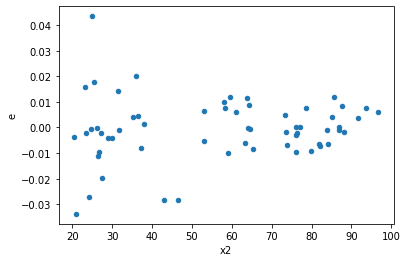

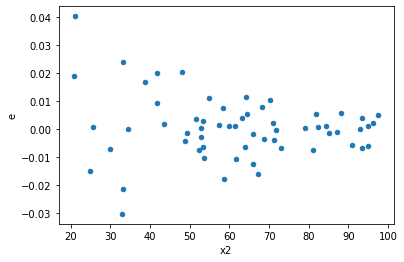

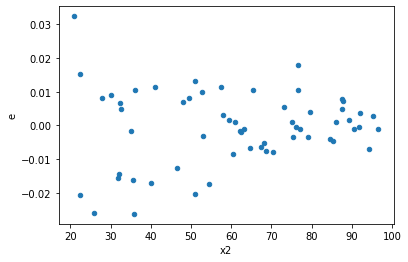

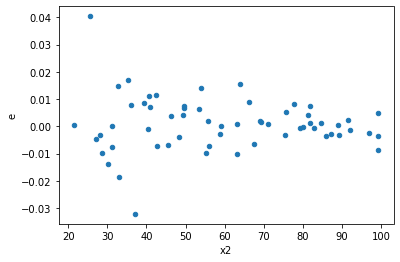

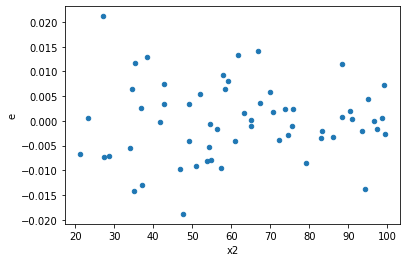

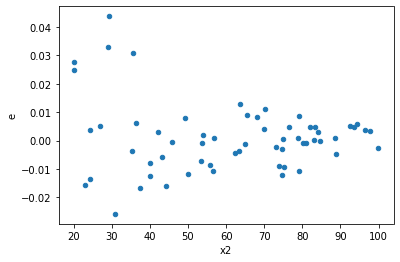

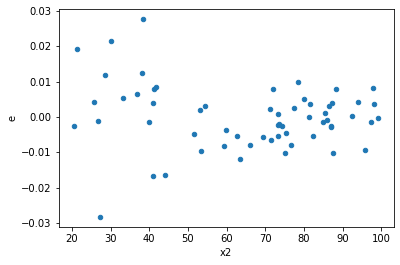

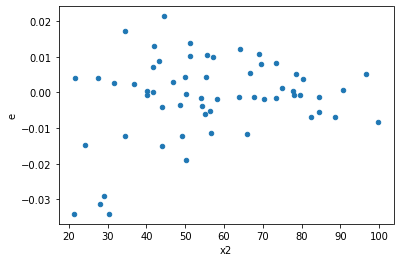

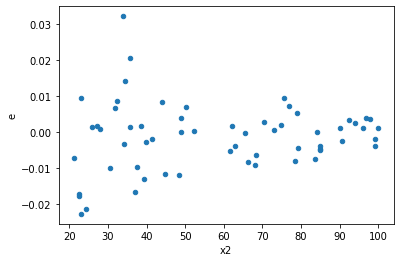

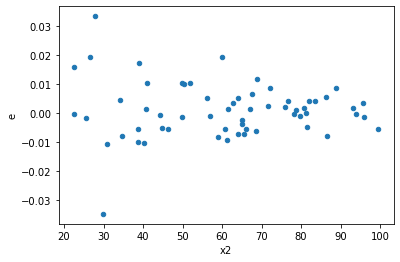

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,29.0,27.0,0.0018141444704718184,0.006635343274677628,6.255670587833857e-05,0.00024575345461768993,3.928490977380359,0.0006028997041769291,0.9996985501479115,0.00030144985208846453,Reject005=0 : Heteroscedasticity
2.0,32.0,24.0,0.0011709809274661534,0.004812402385782844,3.6593153983317295e-05,0.00020051676607428517,5.479625127850421,5.565002201568525e-05,0.9999721749889922,2.7825011007842626e-05,Reject005=0 : Heteroscedasticity
3.0,33.0,23.0,0.001366450688817649,0.004176283482303289,4.1407596630837846e-05,0.00018157754270883863,4.3851263411315875,0.0004605900955518827,0.9997697049522241,0.00023029504777594134,Reject005=0 : Heteroscedasticity
6.0,28.0,28.0,0.0012299636022616034,0.002621097443298377,4.392727150934298e-05,9.361062297494204e-05,2.1310365920412746,0.04984555431788751,0.9750772228410562,0.024922777158943754,Reject005=0 : Heteroscedasticity
9.0,22.0,34.0,0.0007541415191411899,0.00450294988361072,3.427915996096318e-05,0.00013243970245913883,3.8635632439639727,0.0004181513341405818,0.9997909243329297,0.0002090756670702909,Reject005=0 : Heteroscedasticity
10.0,26.0,30.0,0.001041863340677451,0.005100158629334636,4.007166694913273e-05,0.00017000528764448788,4.242530959849857,0.00021561519255208772,0.999892192403724,0.00010780759627604386,Reject005=0 : Heteroscedasticity
11.0,25.0,31.0,0.0011846680687788037,0.004675029343160049,4.738672275115215e-05,0.00015080739816645319,3.1824821260251954,0.0025935713932327964,0.9987032143033836,0.0012967856966163982,Reject005=0 : Heteroscedasticity
15.0,29.0,27.0,0.0013853513314459104,0.006154029697955967,4.777073556710036e-05,0.00022792702585022103,4.771268919024016,0.00010586900267917088,0.9999470654986604,5.293450133958544e-05,Reject005=0 : Heteroscedasticity
18.0,39.0,17.0,0.0013573670009835361,0.0053817776832727525,3.4804282076500925e-05,0.0003165751578395737,9.095868064272418,1.2478314734831741e-05,0.9999937608426326,6.239157367415871e-06,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,27.0,0.0018141444704718184,0.006635343274677628,6.255670587833857e-05,0.00024575345461768993,3.928490977380359,0.0006028997041769291,Reject005=0 : Heteroscedasticity
1.0,33.0,23.0,0.004848465475618332,0.0009299278842988174,0.00014692319623085855,4.0431647143426845e-05,0.275188997929892,0.0007598197864592713,Reject005=0 : Heteroscedasticity
2.0,32.0,24.0,0.0011709809274661534,0.004812402385782844,3.6593153983317295e-05,0.00020051676607428517,5.479625127850421,5.565002201568525e-05,Reject005=0 : Heteroscedasticity
3.0,33.0,23.0,0.001366450688817649,0.004176283482303289,4.1407596630837846e-05,0.00018157754270883863,4.3851263411315875,0.0004605900955518827,Reject005=0 : Heteroscedasticity
4.0,29.0,27.0,0.0017569947935777467,0.0011864527762937885,6.058602736474989e-05,4.3942695418288466e-05,0.7252942193046835,0.39755141560998314,Reject005=1 : Homoscedasticity
5.0,21.0,35.0,0.00518387873832844,0.0034368538048924705,0.0002468513684918305,9.819582299692773e-05,0.3977933101885052,0.02859658390174908,Reject005=0 : Heteroscedasticity
6.0,28.0,28.0,0.0012299636022616034,0.002621097443298377,4.392727150934298e-05,9.361062297494204e-05,2.1310365920412746,0.04984555431788751,Reject005=0 : Heteroscedasticity
7.0,28.0,28.0,0.004548165986459307,0.0014635556448580561,0.00016243449951640384,5.226984445921629e-05,0.32179028848448354,0.0037367951849261657,Reject005=0 : Heteroscedasticity
8.0,14.0,42.0,0.0014917349823659653,0.003435331776015195,0.0001065524987404261,8.17936137146475e-05,0.7676367488472134,0.6078824144778956,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    828
Reject005=1 : Homoscedasticity      172
Name: Result_test, dtype: int64